In [9]:
%load_ext autoreload
%autoreload 2

import numpy as np
from blimpy import read_header, Waterfall, Filterbank


%matplotlib inline
import matplotlib.pyplot as plt

import sys, os, glob
sys.path.insert(0, "../../")
import setigen as stg

from astropy import units as u

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


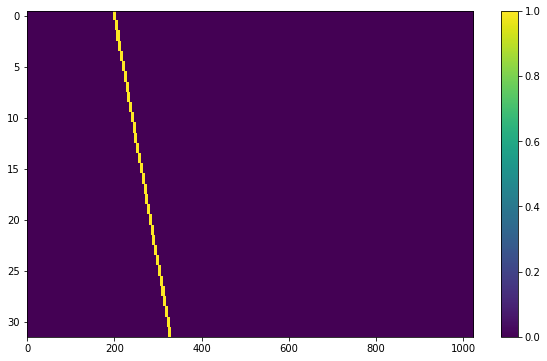

In [2]:
fil = Waterfall('../setigen/assets/placeholder.fil')
frame = stg.Frame(fil=fil)
signal = frame.add_signal(stg.constant_path(f_start = frame.fs[200], 
                                            drift_rate = -0.000004),
                          stg.constant_t_profile(level = 1),
                          stg.box_f_profile(width = 0.00001),
                          stg.constant_bp_profile(level = 1))

fig = plt.figure(figsize=(10,6))
plt.imshow(signal, aspect='auto')
plt.colorbar()
plt.savefig('test.png')
plt.show()

In [4]:
rate = u.pixel / u.Hz
rate

Unit("pix / Hz")

In [5]:
((5*u.Hz) * rate)

<Quantity 5. pix>

In [6]:
import numpy as np
np.random.normal(2, 2, (2,2))

array([[-2.35186095,  0.72592871],
       [ 0.99431968, -0.86202857]])

In [7]:
np.maximum(np.random.normal(2, 2, (2,2)), 2)

array([[2.        , 4.64170041],
       [4.19713249, 2.        ]])

In [8]:
stg.sample_from_array(np.array([0, 2, 4]), (3, 10))

TypeError: sample_from_array() takes 1 positional argument but 2 were given

In [9]:
array = [1,2,3,4]
np.random.randint(0, len(array))

1

In [10]:
(np.random.normal(0, 1, (2,2)) * u.m) * rate

<Quantity [[ 0.19697629, -1.59593947],
           [-0.49646816,  0.65885002]] m pix / Hz>

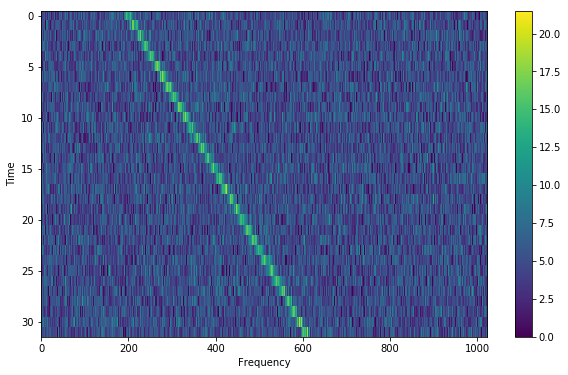

In [10]:
# from astropy import units as u
# import setigen as stg

frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=5, x_std=2, x_min=0)
signal = frame.add_signal(stg.constant_path(f_start=frame.fs[200], 
                                            drift_rate=2*u.Hz/u.s),
                          stg.constant_t_profile(level=frame.compute_intensity(snr=30)),
                          stg.gaussian_f_profile(width=40*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
plt.imshow(frame.get_data(), aspect='auto')
plt.xlabel('Frequency')
plt.ylabel('Time')
plt.colorbar()
plt.savefig('example.png', bbox_inches='tight')
plt.show()

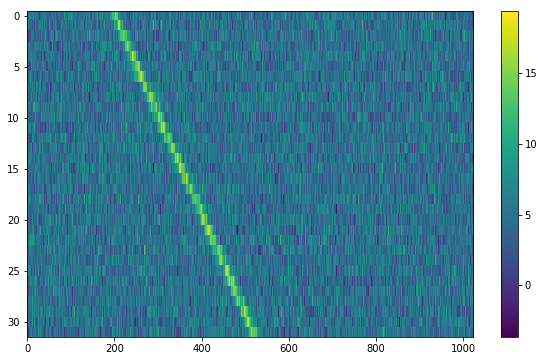

In [2]:
from astropy import units as u
sys.path.append("../")
import setigen as stg

frame = stg.Frame(fchans=1024,
                  tchans=32,
                  df=-1.3969838619232178*u.Hz,
                  dt=1.4316557653333333*u.s,
                  fch1=6.000464843051508*u.GHz)
noise = frame.add_noise(5, 2, 0)
signal = frame.add_signal(stg.constant_path(f_start=frame.fs[200], 
                                            drift_rate=-10*u.Hz/u.s),
                          stg.constant_t_profile(level=10),
                          stg.gaussian_f_profile(width=10*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10,6))
plt.imshow(frame.data, aspect='auto')
plt.colorbar()
plt.savefig('test.png')
plt.show()

In [3]:
frame.get_info()

{'fil': None,
 'header': None,
 'fchans': 1024,
 'df': -1.3969838619232178,
 'fch1': 6000464843.051508,
 'tchans': 32,
 'dt': 1.4316557653333333,
 'shape': (32, 1024),
 'data': array([[ 4.34129072,  3.45435288,  4.48971475, ...,  8.40703608,
          4.02530235,  5.46383183],
        [ 6.02250196,  4.05245595,  0.51967784, ...,  4.56667449,
          4.51598192,  6.7466118 ],
        [ 9.16234678,  4.16581441,  1.38536202, ...,  7.67447603,
          7.01627434,  6.35196729],
        ...,
        [ 3.4589974 ,  6.81136766,  5.15745301, ..., 10.65554686,
          8.56862159,  3.47083969],
        [ 3.12110516,  1.81882564,  6.9704557 , ...,  6.34305484,
          1.28500479,  5.97458451],
        [ 2.41968448,  3.17370184,  6.47378846, ...,  2.35301144,
          3.61102686,  4.15838092]]),
 'fs': array([6.00046484e+09, 6.00046484e+09, 6.00046484e+09, ...,
        6.00046342e+09, 6.00046342e+09, 6.00046341e+09]),
 'ts': array([ 0.        ,  1.43165577,  2.86331153,  4.2949673 ,  5.726

In [33]:
flat_data = frame.data.flatten()
np.mean(np.sort(flat_data)[::-1][int((0.01)*len(flat_data)):])

5.07429727767295

In [34]:
np.std(np.sort(flat_data)[::-1][int((0.01)*len(flat_data)):])

2.0780179505040492

In [25]:
all([x > 0 for x in [1,2,3]])

True

In [24]:
u.Quantity

astropy.units.quantity.Quantity

In [28]:
(1*u.m).unit == (u.m)

True

In [37]:
x = {u.m: 1, u.cm: 2}
list(x.keys())[0]

Unit("m")

In [42]:
([1,2]*u.m)[0]

<Quantity 1. m>

In [32]:
not (None or None or None)

False

In [84]:
np.array(4)

array(4)

In [34]:
x = np.load('../setigen/assets/sample_noise_params.npy')

In [39]:
x[1040]

array([443275.96875   , 229717.484375  ,   5760.84667969])

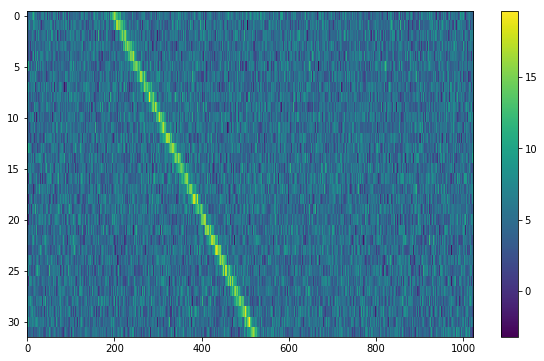

In [2]:
from astropy import units as u
sys.path.append("../")
import setigen as stg

frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=-1.3969838619232178*u.Hz,
                  dt=1.4316557653333333*u.s,
                  fch1=6.000464843051508*u.GHz)
noise = frame.add_noise(5, 2, 0)
signal = frame.add_signal(stg.constant_path(f_start=frame.fs[200], 
                                            drift_rate=-10*u.Hz/u.s),
                          stg.constant_t_profile(level=frame.compute_intensity(snr=30)),
                          stg.gaussian_f_profile(width=10*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
plt.imshow(frame.data, aspect='auto')
plt.colorbar()
plt.savefig('test.png')
plt.show()

(0.0, 0.0, 0.0) (0.0, 0.0, 0.0)
(4.988054506763764, 2.0023621228985724, 0.0) (5, 2, 0.0)
(5.173909731961182, 2.3216870067860613, 0.0) (5, 2, 0.0)


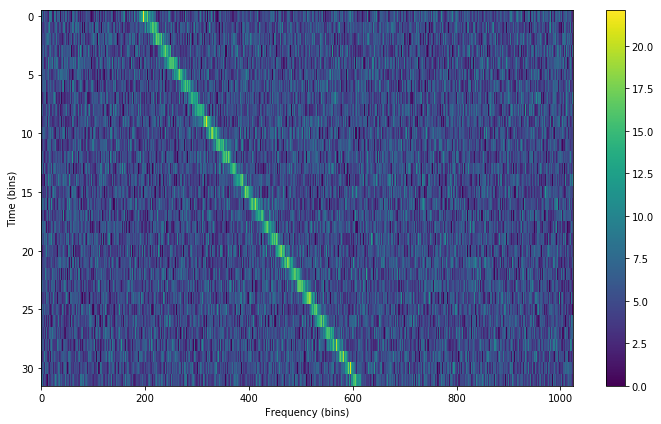

In [43]:
from astropy import units as u
sys.path.append("../")
import setigen as stg

frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=-2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.MHz)
print(frame.get_total_stats(), frame.get_noise_stats())
noise = frame.add_noise(x_mean=5, x_std=2, x_min=0)
print(frame.get_total_stats(), frame.get_noise_stats())
signal = frame.add_signal(stg.constant_path(f_start=frame.fs[200], 
                                            drift_rate=-2*u.Hz/u.s),
                          stg.constant_t_profile(level=frame.compute_intensity(snr=30)),
                          stg.gaussian_f_profile(width=20*u.Hz),
                          stg.constant_bp_profile(level=1))
print(frame.get_total_stats(), frame.get_noise_stats())

fig = plt.figure(figsize=(10, 6))
plt.imshow(frame.get_data(db=False), aspect='auto')
plt.xlabel('Frequency (bins)')
plt.ylabel('Time (bins)')
plt.colorbar()
plt.tight_layout()
# plt.savefig('../doc/source/example.png', bbox_inches='tight')
plt.show()

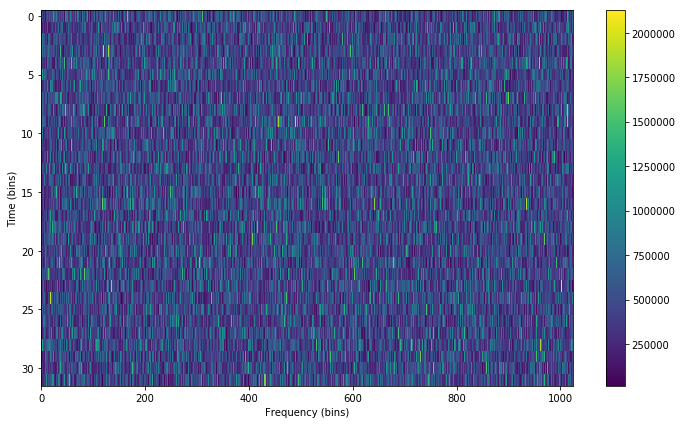

In [3]:
import sys

from astropy import units as u
sys.path.append("../")
import setigen as stg

frame = stg.Frame(fil='../tests/assets/sample.fil')

fig = plt.figure(figsize=(10, 6))
plt.imshow(frame.get_data(db=False), aspect='auto')
plt.xlabel('Frequency (bins)')
plt.ylabel('Time (bins)')
plt.colorbar()
plt.tight_layout()
# plt.savefig('../doc/source/example.png', bbox_inches='tight')
plt.show()

In [11]:
frame.shape

(32, 1024)

(0.0, 0.0, 0.0) (0.0, 0.0, 0.0)
(0.0, 0.0, 0.0) (0.0, 0.0, 0.0)
(0.018602906314555946, 0.11317319948403158, 0.0) (0.0, 0.0, 0.0)


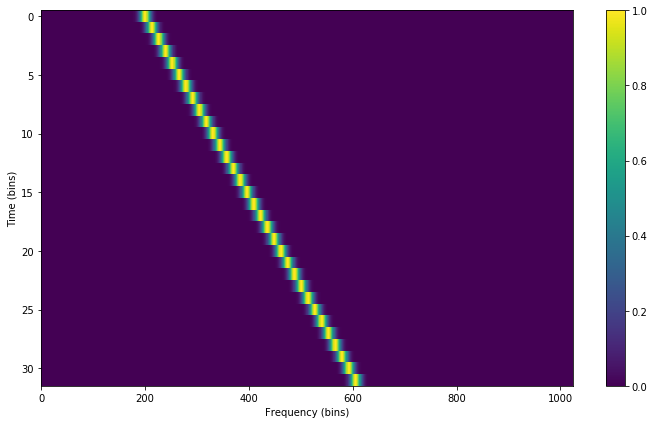

In [11]:
import sys

from astropy import units as u
sys.path.append("../")
import setigen as stg

frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.MHz)
print(frame.get_total_stats(), frame.get_noise_stats())
# noise = frame.add_noise(x_mean=5, x_std=2, x_min=0)
print(frame.get_total_stats(), frame.get_noise_stats())
signal = frame.add_signal(stg.constant_path(f_start=frame.fs[200], 
                                            drift_rate=2*u.Hz/u.s),
                          stg.constant_t_profile(level=1),
                          stg.gaussian_f_profile(width=50*u.Hz),
                          stg.constant_bp_profile(level=1))
print(frame.get_total_stats(), frame.get_noise_stats())

fig = plt.figure(figsize=(10, 6))
plt.imshow(frame.get_data(db=False), aspect='auto')
plt.xlabel('Frequency (bins)')
plt.ylabel('Time (bins)')
plt.colorbar()
plt.tight_layout()
# plt.savefig('../doc/source/example.png', bbox_inches='tight')
plt.show()

In [20]:
import copy
copy.deepcopy(frame)

In [15]:
np.save('../tests/assets/test_frame_data.npy', frame.get_data())

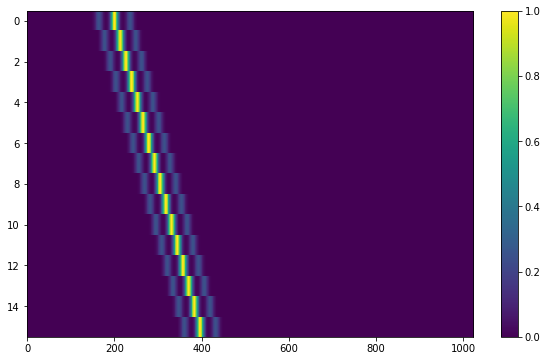

In [13]:
fch1 = 6095.214842353016*u.MHz
df = -2.7939677238464355*u.Hz
dt = 18.25361108*u.s
fchans = 1024
tchans = 16

frame = stg.Frame(fchans, tchans, df, dt, fch1)
signal = frame.add_signal(stg.constant_path(f_start=frame.fs[200], 
                                            drift_rate=-2*u.Hz/u.s),
                          stg.constant_t_profile(level=1),
                          stg.multiple_gaussian_f_profile(width=40*u.Hz),
                          stg.constant_bp_profile(level=1))

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
plt.imshow(frame.get_data(), aspect='auto')
plt.colorbar()

# fig.savefig("../doc/source/cookbook/multiple_gaussian_profile.png", bbox_inches='tight')
plt.show()


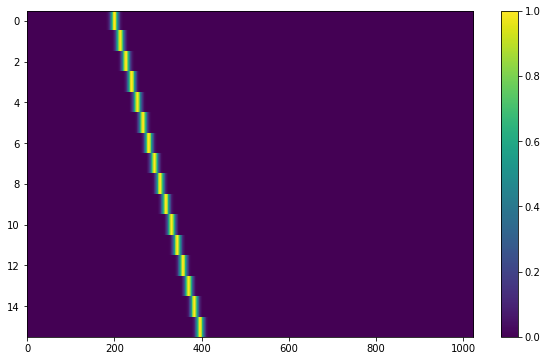

In [12]:
fch1 = 6095.214842353016*u.MHz
df = 2.7939677238464355*u.Hz
dt = 18.25361108*u.s
fchans = 1024
tchans = 16

frame = stg.Frame(fchans, tchans, df, dt, fch1)
signal = frame.add_signal(stg.constant_path(f_start=frame.fs[200], 
                                            drift_rate=2*u.Hz/u.s),
                          stg.constant_t_profile(level=1),
                          stg.gaussian_f_profile(width=40*u.Hz),
                          stg.constant_bp_profile(level=1))

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
plt.imshow(frame.get_data(), aspect='auto')
plt.colorbar()

# fig.savefig("../doc/source/cookbook/gaussian_profile.png", bbox_inches='tight')
plt.show()


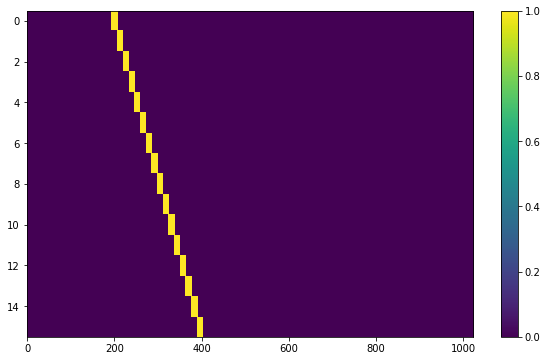

In [15]:
fch1 = 6095.214842353016*u.MHz
df = 2.7939677238464355*u.Hz
dt = 18.25361108*u.s
fchans = 1024
tchans = 16

frame = stg.Frame(fchans, tchans, df, dt, fch1)
signal = frame.add_signal(stg.constant_path(f_start=frame.fs[200], 
                                            drift_rate=2*u.Hz/u.s),
                          stg.constant_t_profile(level=1),
                          stg.box_f_profile(width=40*u.Hz),
                          stg.constant_bp_profile(level=1))

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
plt.imshow(frame.get_data(), aspect='auto')
plt.colorbar()

# fig.savefig("../doc/source/cookbook/box_profile.png", bbox_inches='tight')
plt.show()


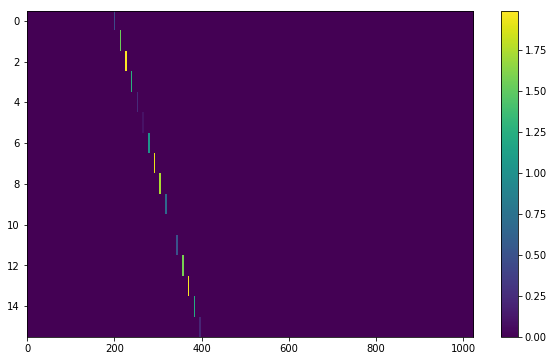

In [66]:
import setigen as stg
import numpy as np

# Define time and frequency arrays, essentially labels for the 2D data array
tsamp = 18.25361108
fch1 = 6095.214842353016
df = -2.7939677238464355e-06
fchans = 1024
tchans = 16
fs = np.arange(fch1, fch1 + fchans * df, df)
ts = np.arange(0, tchans * tsamp, tsamp)

# Generate the signal
signal = stg.generate(ts,
                      fs,
                      stg.constant_path(f_start = fs[200], drift_rate = -0.000002),
                      stg.sine_t_profile(period = 100, amplitude = 1, level = 1),
                      stg.box_f_profile(width = 0.00001),
                      stg.constant_bp_profile(level = 1))

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
plt.imshow(signal, aspect='auto')
plt.colorbar()
# fig.savefig("basic_signal.png", bbox_inches='tight')

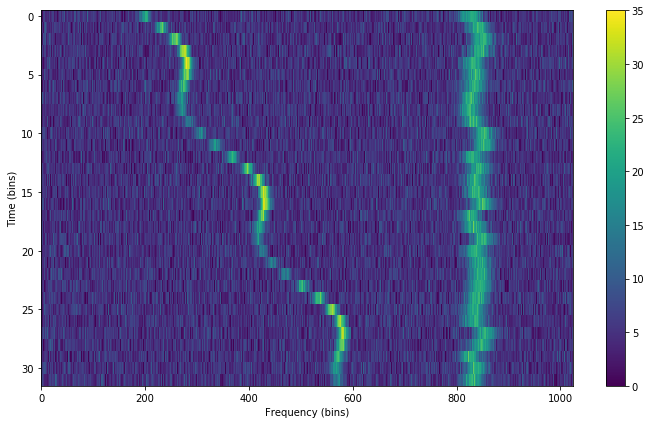

In [41]:
from astropy import units as u
sys.path.append("../")
import setigen as stg

frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=-2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.Hz)

noise = frame.add_noise(x_mean=5, x_std=2, x_min=0)

signal = frame.add_signal(stg.sine_path(f_start = frame.fs[200], drift_rate = -2*u.Hz/u.s,
                                    period = 20, amplitude = 100*u.Hz),
                          stg.sine_t_profile(period=20, 
                                             amplitude=frame.compute_intensity(snr=25), 
                                             level=frame.compute_intensity(snr=50)),
                          stg.gaussian_f_profile(width=20*u.Hz),
                          stg.constant_bp_profile(level=1))

signal = frame.add_signal(stg.choppy_rfi_path(f_start = frame.fs[840], drift_rate = 0*u.Hz/u.s,
                                    spread = 100*u.Hz),
                          stg.constant_t_profile(level=frame.compute_intensity(snr=50)),
                          stg.gaussian_f_profile(width=40*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
plt.imshow(frame.get_data(db=False), aspect='auto')
plt.xlabel('Frequency (bins)')
plt.ylabel('Time (bins)')
plt.colorbar()
plt.tight_layout()
# plt.savefig('../doc/source/flashy_synthetic.png', bbox_inches='tight')
plt.show()

In [7]:
frame.save_fil('test.fil')

blimpy.waterfall INFO     Conversion time: 0.17sec


In [16]:
a = 1
b = 1.
a == b == 1

True

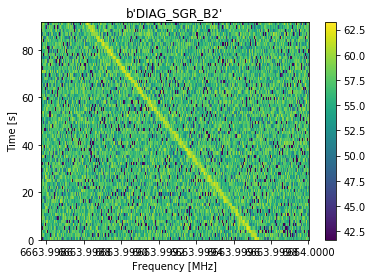

In [8]:
Waterfall('test.fil').plot_waterfall()

In [44]:
frame.get_intensity(100)

3800531.9822241594

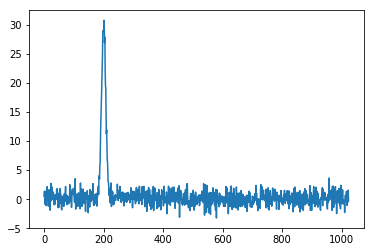

In [29]:
plt.plot((np.mean(frame.data, axis=0) - frame.noise_mean) / frame.noise_std * np.sqrt(frame.tchans))

In [15]:
frame.min

16069.857421875

In [38]:
a = A()
a.a, a.b

(2, 2)

In [40]:
a.a

2

In [41]:
a.b

3

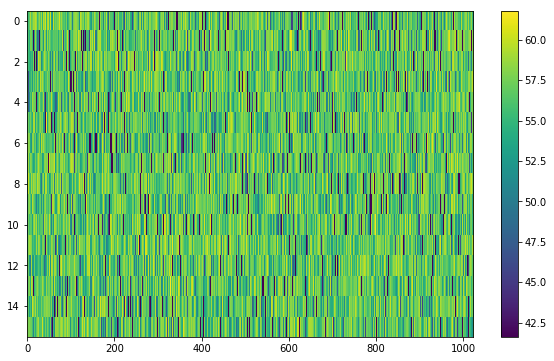

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
import setigen as stg

# Define time and frequency arrays, essentially labels for the 2D data array
fchans = 1024
tchans = 16
df = -2.7939677238464355*u.Hz
dt = 18.25361108*u.s
fch1 = 6095.214842353016*u.MHz

# Generate the signal
frame = stg.Frame(fchans, tchans, df, dt, fch1)
noise = frame.add_noise_from_obs()

fig = plt.figure(figsize=(10,6))
plt.imshow(frame.get_data(db=True), aspect='auto')
plt.colorbar()
# fig.savefig('../doc/source/cookbook/noise_from_obs_params.png', bbox_inches='tight')
plt.show()

In [3]:
from astropy import units as u

obs_df = -1.3969838619232178*u.Hz
obs_dt = 1.4316557653333333*u.s

In [4]:
df = -2.7939677238464355*u.Hz
dt = 18.25361108*u.s

In [8]:
(dt / obs_dt * df / obs_df).value

25.50000010058284

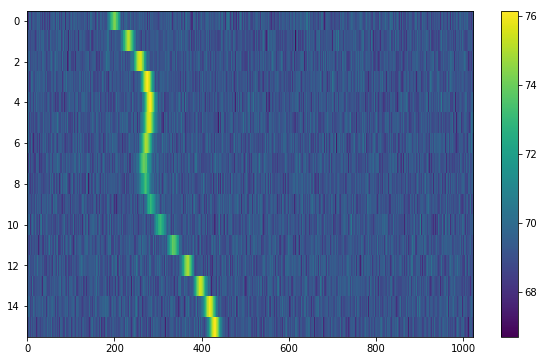

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
import setigen as stg

# Define time and frequency arrays, essentially labels for the 2D data array
fchans = 1024
tchans = 16
df = -2.7939677238464355*u.Hz
dt = 18.25361108*u.s
fch1 = 6095.214842353016*u.MHz

# Generate the signal
frame = stg.Frame(fchans, tchans, df, dt, fch1)
noise = frame.add_noise_from_obs(share_index=True)

signal = frame.add_signal(stg.sine_path(f_start = frame.fs[200], drift_rate = -2*u.Hz/u.s,
                                    period = 20, amplitude = 100*u.Hz),
                          stg.sine_t_profile(period=20, 
                                             amplitude=frame.compute_intensity(snr=50), 
                                             level=frame.compute_intensity(snr=100)),
                          stg.gaussian_f_profile(width=20*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10,6))
plt.imshow(frame.get_data(db=True), aspect='auto')
plt.colorbar()
# fig.savefig('../doc/source/cookbook/noise_from_obs_params.png', bbox_inches='tight')
plt.show()

# # Generate the signal
# frame = stg.Frame(fchans, tchans, df, dt, fch1)
# frame.data += noise * (dt / obs_dt * df / obs_df).value

# fig = plt.figure(figsize=(10,6))
# plt.imshow(frame.get_data(db=True), aspect='auto')
# plt.colorbar()
# # fig.savefig('../doc/source/cookbook/noise_from_obs_params.png', bbox_inches='tight')
# plt.show()

In [40]:
np.min(frame.data)

4688215.507822221

In [37]:
10**(84/10)

251188643.1509582

In [41]:
251188643.1509582/4688215.507822221

53.57873219178033

In [19]:
np.random.randint(1)

0

In [42]:
# def gaussian(x, mu, sigma):
#     return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.)))
x = stg.gaussian(0, 1, 1000)

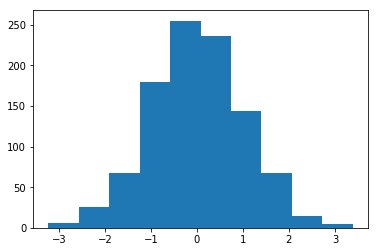

In [43]:
plt.hist(x)
plt.show()

In [44]:
np.mean(x), np.std(x)

(0.01428681230534573, 1.0053071569917238)

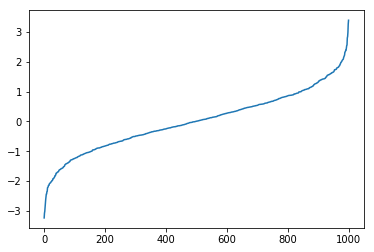

In [46]:
plt.plot(np.sort(x))

In [51]:
x[:6]

array([-0.00419686,  0.1256591 ,  1.07609019,  0.15574063,  0.56267661,
        0.23909808])

In [56]:
x1 = np.sum(np.reshape(x, (500, 2)), axis=1)

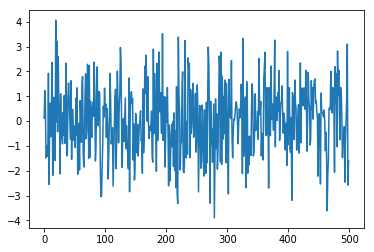

In [57]:
plt.hist(x1)
plt

In [15]:
x = stg.gaussian(2, 1, 1000)
print(np.mean(x), np.std(x))
x1 = np.sum(np.reshape(x, (250, 4)), axis=1)
print(np.mean(x1), np.std(x1))
print(np.mean(x1)/np.mean(x), np.std(x1)/np.std(x))

1.9997830503408849 0.9732876632270436
7.9991322013635395 1.9413396686628923
4.0 1.9946206471231378


In [42]:
x = range(10)

In [48]:
stg.get_data(Waterfall('../setigen/assets/sample.fil')).shape

(32, 1024)

In [67]:
fil_generator = stg.split_utils.split_fil_generator('../setigen/assets/sample.fil',
                                    16,)

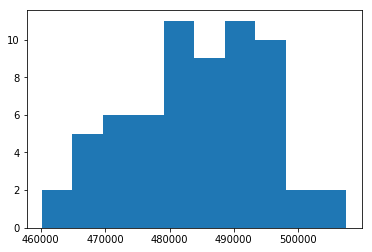

In [77]:
fil_generator = stg.split_fil_generator('../setigen/assets/sample.fil',
                                    16,)

means = []
for fil in fil_generator:
    means.append(np.mean(stg.get_data(fil)))
    
plt.hist(means, bins=10)
plt.show()

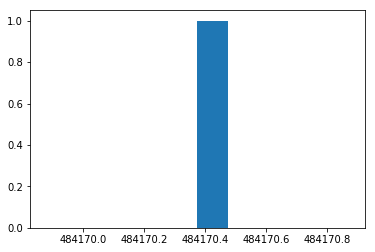

In [75]:
fil_generator = stg.split_utils.split_fil_generator('../setigen/assets/sample.fil',
                                    1024,)

means = []
for fil in fil_generator:
    means.append(np.mean(stg.get_data(fil)))
    
plt.hist(means, bins=10)
plt.show()

In [82]:
means, stds, mins = stg.get_parameter_distributions('../setigen/assets/sample.fil',
                               16)

In [84]:
means.shape, stds.shape, mins.shape

((64,), (64,), (64,))

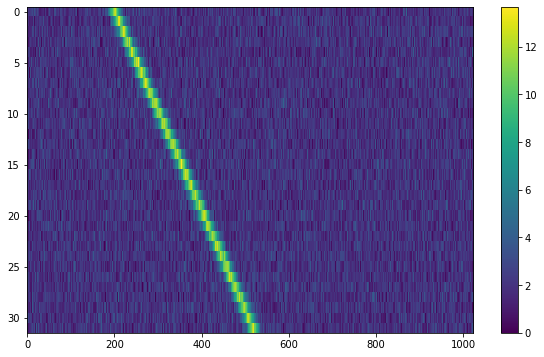

In [18]:
from astropy import units as u
sys.path.append("../")
import setigen as stg

frame = stg.Frame(fchans=1024,
                  tchans=32,
                  df=1.3969838619232178*u.Hz,
                  dt=1.4316557653333333*u.s,
                  fch1=6.000464843051508*u.GHz)
noise = frame.add_noise(1, 0.5, 0)
noise = frame.add_noise(1, 0.5, 0)
signal = frame.add_signal(stg.constant_path(f_start=frame.fs[200], 
                                            drift_rate=10*u.Hz/u.s),
                          stg.constant_t_profile(level=10),
                          stg.gaussian_f_profile(width=30*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10,6))
plt.imshow(frame.data, aspect='auto')
plt.colorbar()
plt.show()

0 0


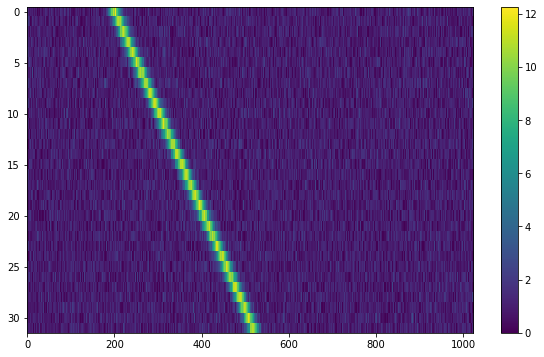

In [32]:
fil = Waterfall('../setigen/assets/sample.fil')
frame = stg.Frame(fil=fil)
frame.zero_data()
print(frame.noise_mean, frame.noise_std)
frame.add_noise(1,0.5,0)
frame.add_signal(stg.constant_path(f_start = frame.fs[200], 
                                            drift_rate = 10*u.Hz/u.s),
                          stg.constant_t_profile(level = 10),
                          stg.gaussian_f_profile(width = 30*u.Hz),
                          stg.constant_bp_profile(level = 1))

fig = plt.figure(figsize=(10,6))
plt.imshow(frame.get_data(), aspect='auto')
plt.colorbar()
plt.show()

In [35]:
frame.noise_mean

1

In [37]:
frame.get_total_stats()

(1.2287484413552805, 1.3298712205175132)

In [38]:
frame.get_noise_stats()

(1, 0.5)

In [39]:
fil = Waterfall('../setigen/assets/sample.fil')
frame = stg.Frame(fil=fil)
frame.mean()

484170.38

In [44]:
frame.std()

253477.6